# Figure 1, part 2

Removed splicing events in genes with TPM < 1 in Notebook `1.1 Supplementary Figure 1`.

In [22]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure1_expression'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

2016-02-21 16:41:11	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2016-02-21 16:41:11	Parsing datapackage to create a Study object
2016-02-21 16:41:44	Initializing Study
2016-02-21 16:41:44	Initializing Predictor configuration manager for Study
2016-02-21 16:41:44	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-21 16:41:44	Added ExtraTreesClassifier to default predictors
2016-02-21 16:41:44	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-21 16:41:44	Added ExtraTreesRegressor to default predictors
2016-02-21 16:41:44	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-21 16:41:44	Added GradientBoostingClassifier to default predictors
2016-02-21 16:41:44	Predictor GradientBoostingRegressor is of typ

In [23]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [24]:
study.metadata._phenotype_to_color = {u'MN': u'#228a44',
                                     u'NPC': u'#73c476',
                                     u'iPSC': u'#c7e9c0'}

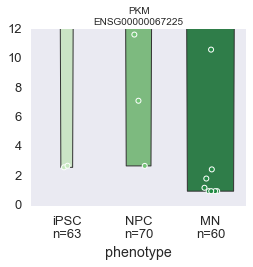

In [25]:
with sns.axes_style('dark'):
    study.plot_gene('PKM', sample_subset='~outlier')
    fig = plt.gcf()
    for ax in fig.axes:
        ax.set(ylim=(0, 12))

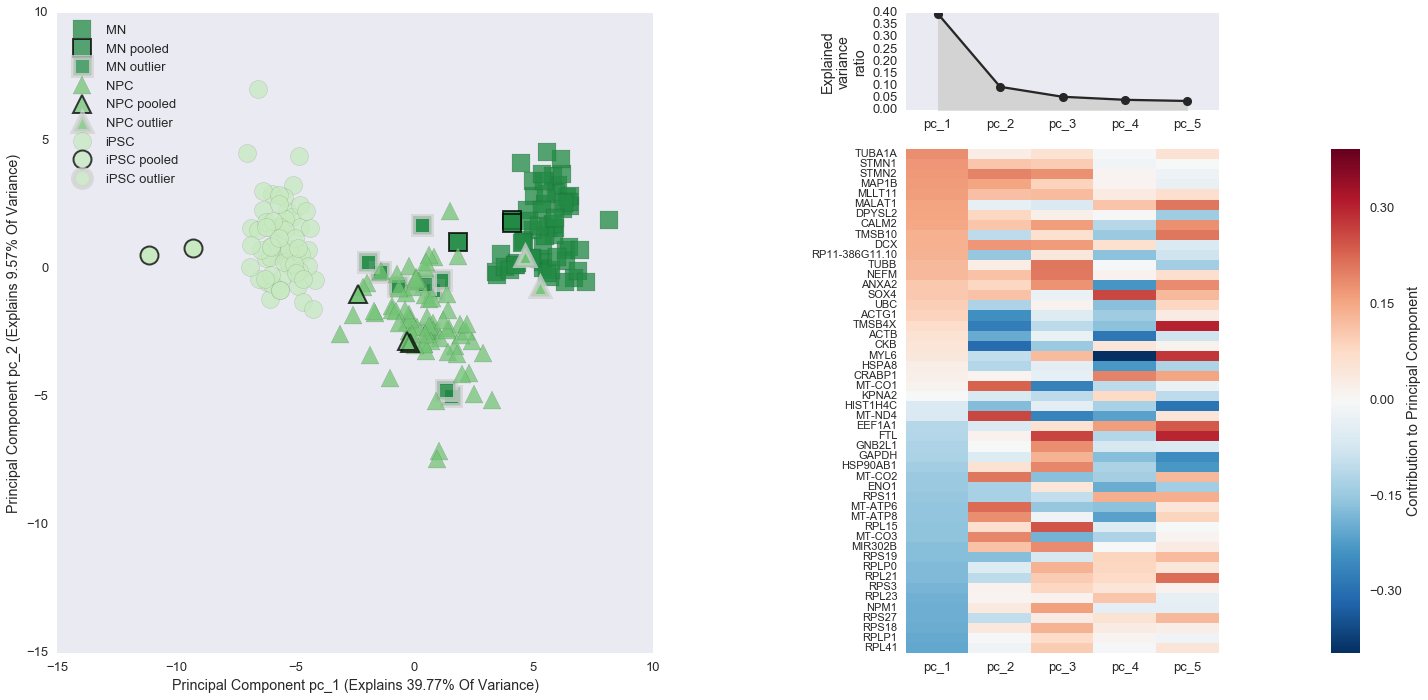

In [26]:
with sns.axes_style('dark'):
    viz = study.plot_pca(show_vectors=False, scale_by_variance=False, markersize=18)
    xmin, xmax, ymin, ymax = viz.ax_components.axis()
    vmin = min(xmin, ymin)
    vmax = max(xmax, ymax)
    viz.ax_components.set(xlim=(vmin, vmax), ylim=(vmin, vmax))
    viz.fig_reduced.savefig('{}/expression_pca.pdf'.format(folder))

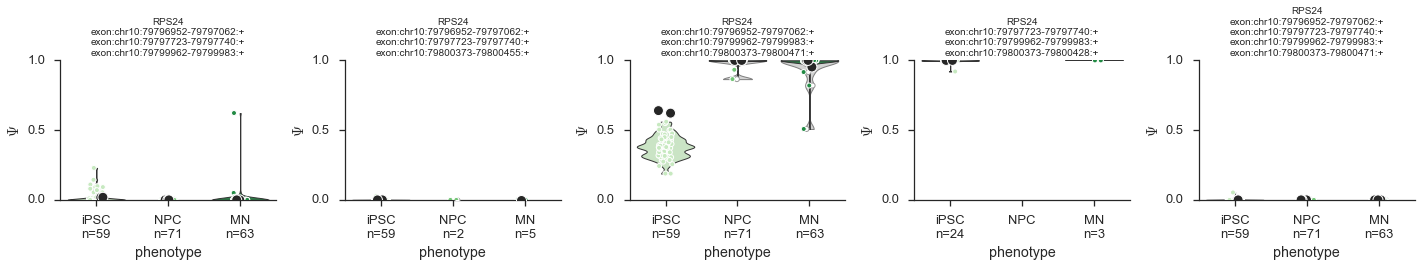

In [27]:
study.plot_event("RPS24")

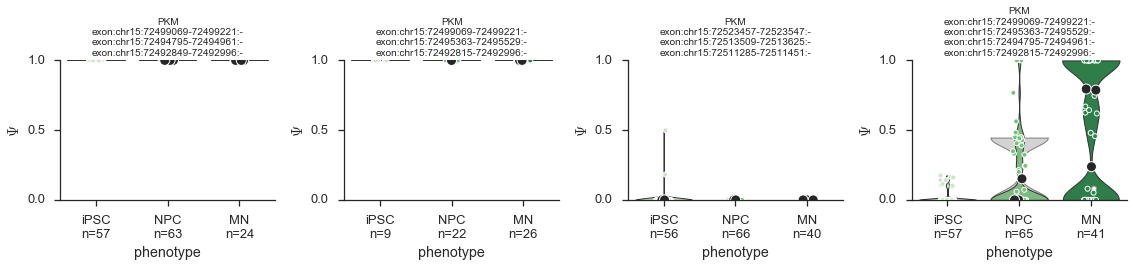

In [28]:
study.plot_event("PKM")

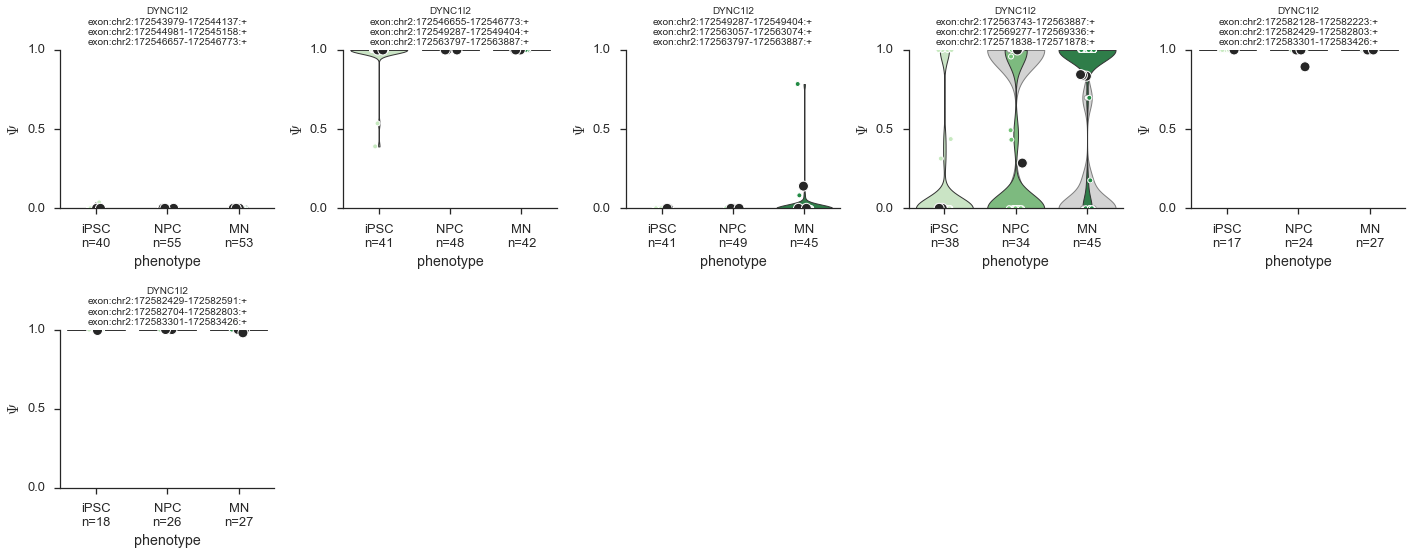

In [29]:
study.plot_event("DYNC1I2")

### Number of splicing events in non-differentially expressed genes

In [30]:
from flotilla.compute.expression import differential_expression


In [31]:
singles_not_outliers = study.expression.singles.loc[~study.expression.singles.index.isin(study.expression.outlier_samples)]
singles_not_outliers.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,ENSGR0000182378,ENSGR0000185960,ENSGR0000197976,ENSGR0000198223,ENSGR0000205755,ENSGR0000214717,ENSGR0000223511,ENSGR0000226179,ENSGR0000236871,ENSGR0000270726
CVN_01,767.114000,12.916510,1.000000,1.000000,6.721675,1,3.300000,1,1.000000,208.38101,...,3.421384,1.057492,1.223986,2.023710,1.057739,127.908810,1.112321,1.086377,1.000000,7.491240
CVN_02,40.467100,1.000000,1.000000,1.081765,1.000000,1,1.417855,1,2.735074,101.55300,...,20.020100,1.409577,1.000000,1.483182,1.000000,1.000000,1.000000,1.083834,1.062575,13.421780
CVN_03,1.106833,1.000000,2.398650,1.000000,1.000000,1,1.224092,1,1.000000,1.00000,...,1.169577,1.000000,1.000000,1.257156,1.200433,1.000000,1.000000,1.000000,1.000000,1.000000
CVN_04,343.142000,6.037272,1.000000,1.000000,103.150000,1,290.221300,1,2.227037,41.45520,...,3.130130,1.477311,1.000000,1.167390,1.102106,1.145061,1.000000,3.034340,1.153298,2.895840
CVN_05,185.010000,34.872500,1.199726,20.338940,1.317592,1,76.760700,1,1.530706,416.21884,...,1.866378,1.277275,1.000000,1.565478,1.197631,99.139160,1.000000,1.069501,1.096628,1.467557


In [32]:
differential_results = differential_expression(singles_not_outliers, groupby=study.sample_id_to_phenotype)

In [33]:
differential_results.head()

,gene_id,U_statistic,p_value,bonferonni_p_value
0,ENSG00000234273,182.385219,2.486296e-40,3.985035e-36
1,ENSG00000258417,182.385219,2.486296e-40,3.985035e-36
2,ENSG00000249152,182.385219,2.486296e-40,3.985035e-36
3,ENSG00000130203,182.385219,2.486296e-40,3.985035e-36
4,ENSG00000167600,182.385219,2.486296e-40,3.985035e-36


In [34]:
differential_results['log10_bonferonni_p_value'] = -np.log10(differential_results.bonferonni_p_value)

In [35]:
p_cutoff = -2

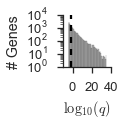

In [36]:
fig, ax = plt.subplots(figsize=(2, 2))
plt.yscale('log', nonposy='clip')

sns.distplot(differential_results['log10_bonferonni_p_value'], color='grey', kde=False)
ymin, ymax = ax.get_ylim()
ax.locator_params('x', nbins=4)

ax.vlines(p_cutoff, ymin, ymax, linestyle='--')
ax.set(ylabel='# Genes', xlabel='$\log_{10}(q)$')
sns.despine()

fig.tight_layout()
fig.savefig('{}/differential_expression_kruskal_wallis_bonferonni_p_value_cutoff.pdf'.format(folder))

In [37]:
non_de_genes = differential_results.gene_id.loc[differential_results.log10_bonferonni_p_value > p_cutoff]
non_de_event_names = study.splicing.expression_to_splicing_id(non_de_genes)

5957


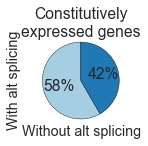

In [38]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[non_de_event_names].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = pd.Index(non_de_genes).difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Constitutively\nexpressed genes')
fig.tight_layout()
fig.savefig('{}/constitutively_expressed_genes_percentage_genes_with_events.pdf'.format(folder))


### Number of splicing events in all expressed genes

4622


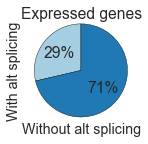

In [39]:
import collections
import itertools

event_per_genes = pd.Series(collections.Counter(itertools.chain(
            *study.splicing.feature_data.ensembl_id[study.splicing.data.columns].map(
        lambda x: x.split(',')))))
# event_per_genes = s.groupby(s).size()
genes_without_splicing_events = study.expression.data.columns.difference(event_per_genes.index)

print len(event_per_genes)

fig, ax = plt.subplots(figsize=(2.25, 2.25))
labels = 'Genes with alternative splice junctions', 'Genes without alternative slpice junctions'
sizes = [len(event_per_genes), len(genes_without_splicing_events)]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

ax.pie(sizes, labels=None, colors=sns.color_palette('Paired'),
        autopct='%1.f%%', startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal')
ax.set(ylabel='With alt splicing', 
       xlabel='Without alt splicing', title='Expressed genes')
fig.tight_layout()
fig.savefig('{}/percentage_genes_with_events.pdf'.format(folder))


In [40]:
sns.set(style='ticks', context='paper')

                     test_statistic   p_value
group2    group1                             
RBP       All genes        773126.0  0.000201
          lincRNA            5076.5  0.001352
          TF                44746.0  0.001900
All genes lincRNA           71323.5  0.021413
lincRNA   TF                 4365.5  0.045804
All genes TF               618147.0  0.250087


/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


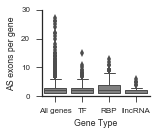

In [41]:
tf_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_tf']].dropna()
rbp_events = event_per_genes[study.expression.feature_subsets['gerstberger2014_rbp_target_mrna']].dropna()
lincrna_events = event_per_genes[study.expression.feature_subsets['transcript_type: lincRNA']].dropna()

all_genes_events = event_per_genes.reset_index()
all_genes_events['Gene Type'] = 'All genes'

tf_events = tf_events.reset_index()
tf_events['Gene Type'] = 'TF'

rbp_events = rbp_events.reset_index()
rbp_events['Gene Type'] = 'RBP'

lincrna_events = lincrna_events.reset_index()
lincrna_events['Gene Type'] = 'lincRNA'

events_per_gene_type = pd.concat([all_genes_events, tf_events, rbp_events, lincrna_events])
events_per_gene_type = events_per_gene_type.rename(columns={0:'AS exons per gene'})

fig, ax = plt.subplots(figsize=(2.25, 2))
sns.boxplot(x='Gene Type', y='AS exons per gene', data=events_per_gene_type, linewidth=1, color='grey')
sns.despine()
ax.locator_params('y', nbins=5)
# ax.set_ylim(0, 100)

from scipy.stats import mannwhitneyu
import itertools

grouped = events_per_gene_type.groupby('Gene Type')
groups = grouped.groups.keys()

comparisons = itertools.combinations(groups, 2)

col = 'AS exons per gene'

results = []
for group1, group2 in comparisons:
    test_statistic, p_value = mannwhitneyu(grouped.get_group(group1)[col], grouped.get_group(group2)[col])
    results.append([group1, group2, test_statistic, p_value])

columns = ['group1', 'group2', 'test_statistic', 'p_value']

mannwhitney_results = pd.DataFrame(results, columns=columns)
mannwhitney_results = mannwhitney_results.set_index(['group2', 'group1']).sort_index()
print mannwhitney_results.sort('p_value')
# ## Know that RBP-everything else is significant, so plot those
# others = ('All genes', 'TF', 'lincRNA')
# xticklabels = [x.get_text() for x in ax.get_xticklabels()]
# rbp_i = xticklabels.index('RBP')

# ymax = grouped[col].max().max()

# offset = 0
# yrange = ymax - grouped[col].min().min()
# offset_interval = yrange*0.1
# for i, other in enumerate(others):
#     offset = offset_interval*(i+1)
#     other_i = xticklabels.index(other)
#     ax.annotate("", xy=(rbp_i, ymax+offset), xycoords='data',
#                xytext=(other_i, ymax+offset), textcoords='data',
#                arrowprops=dict(arrowstyle="-", ec='#444444',
#                                connectionstyle="bar,fraction=0.08"))
#     middle = abs((rbp_i + other_i)/2.)
#     ax.text(middle, ymax + offset, '***',
#            horizontalalignment='center',
#            verticalalignment='center', fontsize=16)
# ax.set(xlabel='*** $p<10^{-10}$')
fig.tight_layout()
fig.savefig('{}/splicing_events_per_gene.pdf'.format(folder))

## Venn Diagram of shared events

In [42]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh=20, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicing20.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\n20+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_splicing/shared_events_venn_20_per_phenotype.pdf')

NameError: name 'splicing20' is not defined

## Lavalamp plots

In [ ]:
study.splicing.data.shape

In [ ]:
singles_no_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
len(singles_no_outliers)

In [ ]:
splicing_singles = study.splicing.data.loc[singles_no_outliers]
splicing_singles_count = splicing_singles.groupby(study.sample_id_to_phenotype).count()
twenty_per_celltype = (splicing_singles_count >= 20).any(axis=0)
splicing20 = study.splicing.data[twenty_per_celltype[twenty_per_celltype].index]
print splicing20.shape

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
fig, ax = plt.subplots(figsize=(2, 2))
plt.xscale('log', nonposx='clip')
sns.distplot(splicing20.values.flat, bins=np.linspace(0, 1, 20), color='grey', kde=False, vertical=True)
ax.set(yticks=(0, 0.5, 1), ylabel='$\Psi$', xlabel='AS Exons')
sns.despine()
fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_distplot.pdf'.format(folder))

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2))
flotilla.visualize.splicing.lavalamp(splicing20, color='grey', ax=ax)
# fig = plt.gcf()
fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_lavalamp_all.png'.format(folder))

In [ ]:
fig, (ax_lavalamp, ax_hist) = plt.subplots(ncols=2, figsize=(3.75, 1), sharey=True,
                                           gridspec_kw=dict(width_ratios=(0.8, 0.2), wspace=0.05))

flotilla.visualize.splicing.lavalamp(splicing20, color='grey', ax=ax_lavalamp)

# Set the histogram axes as the current axes
plt.sca(ax_hist)
plt.xscale('log', nonposx='clip')
sns.distplot(splicing20.values.flat, bins=np.linspace(0, 1, 10), color='grey', 
             kde=False, vertical=True, ax=ax_hist)
# ax_hist.set(yticks=[], ylabel='', xlabel='')
sns.despine()
# fig.tight_layout()
fig.savefig('{}/splicing_20_per_celltype_distplot_lavalamp.pdf'.format(folder), dpi=72)

In [ ]:
sns.set(context='paper', style='ticks')

In [ ]:
import matplotlib_venn

events_per_phenotype = dict((name, set(df.dropna(thresh=20, axis=1).dropna(how='all',axis=0).columns))
                            for name, df in splicing20.groupby(study.sample_id_to_phenotype))
events_per_phenotype_count = pd.Series(events_per_phenotype).map(len)

phenotypes, events = zip(*events_per_phenotype.items())

fig, ax = plt.subplots(figsize=(1.8, 1.8))
matplotlib_venn.venn3(events, set_labels=phenotypes, 
                      set_colors=[study.phenotype_to_color[p] for p in phenotypes])
ax = plt.gca()
ax.set_title('Alternative splicing events\n20+ cells per celltype')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_splicing/shared_events_venn_20_per_phenotype.pdf')